# Tutorial 5 Glue Manufacturer

## Project Description
A manufacturer of advanced adhesive is studying the effect of 15 ingredients on the failure modes of adhered surfaces.
When subjected to loading, de-bonding may occur at different locations in the adhesive joint. The Dataset listed the
amount of these 15 ingredients (all scaled) for:
 - 60 Samples with type 1 failure.
 - 70 Samples with type 2 failure.
 - 50 Samples with type 3 failure.

##### Part A
Do a PCA and find the first two Principal Components (PC1 and PC2). Plot PC1-PC2 for these 180 samples (identify the 3
types of failures). Check how much information will preserve if we only use the first 4 principal components; in other
words, if instead of using all 15 variables, we use the 4 new variables (the first 4 PCs).

##### Part B
Build an ANN classifier for this dataset. Once with these new 4 variables.
      

## Importing the Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

In [17]:
dataset = pd.read_csv('../data/Glue.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [18]:
dataset

,1.423,1.71,2.43,1.56,1.27,2.8,3.06,2.8.1,2.29,2.82,1.04,3.92,0.27,1.065,2.08,Type 1
0,1.320,1.78,2.14,1.12,1.00,2.65,2.76,2.6,1.28,2.190,1.05,3.40,0.25,1.050,2.10,Type 1
1,1.316,2.36,2.67,1.86,1.01,2.80,3.24,3.0,2.81,2.840,1.03,3.17,0.29,1.185,2.06,Type 1
2,1.437,1.95,2.50,1.68,1.13,3.85,3.49,2.4,2.18,3.900,0.86,3.45,0.23,1.480,1.72,Type 1
3,1.324,2.59,2.87,2.10,1.18,2.80,2.69,3.9,1.82,2.160,1.04,2.93,0.38,0.735,2.08,Type 1
4,1.420,1.76,2.45,1.52,1.12,3.27,3.39,3.4,1.97,3.375,1.05,2.85,0.33,1.450,2.10,Type 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1.327,4.28,2.26,2.00,1.20,1.59,0.69,4.3,1.35,5.100,0.59,1.56,0.42,0.835,1.18,Type 3
175,1.317,2.59,2.37,2.00,1.20,1.65,0.68,5.3,1.46,4.650,0.60,1.62,0.52,0.840,1.20,Type 3
176,1.413,4.10,2.74,2.45,0.96,2.05,0.76,5.6,1.35,4.600,0.61,1.60,0.55,0.560,1.22,Type 3
177,1.285,3.27,2.58,2.20,1.06,1.65,0.60,6.0,0.96,2.790,0.87,2.11,0.59,0.570,1.74,Type 3


### Encoding the Output Data
Here, we replace Type 1, Type 2, and Type 3 failure with Labels 0,1, and 2

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

It means: Z0 and Z1 can describe about 98% of the data (i.e. the variation in data).<br>
<font color=red> In simple words, we say, using Z0 and Z1, 98% of the information preserves. 

## PCA

In [20]:
from sklearn.decomposition import PCA

PrinCom = PCA(n_components=15)  # we choose the number of PCs
PrinCom.fit(X)
Z = PrinCom.transform(X)

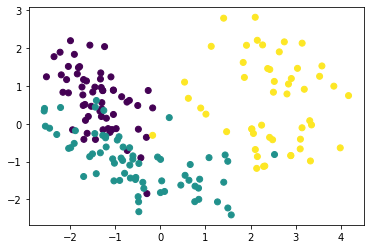

In [21]:
plt.scatter(Z[:, 0], Z[:, 1], c=y)

<font color=red> As you can see from this plot, even the first 2 PCs can almost classifies these 3 types for us. 

### Let's Check the Contribution of these PCs
(Please refer to the lecture on this topic, to learn how to compute PCs contribution)

In [22]:
# I did it one by one, rather in a loop; so you could follow what we are doing....
e0 = np.var(Z[:, 0])
e1 = np.var(Z[:, 1])
e2 = np.var(Z[:, 2])
e3 = np.var(Z[:, 3])
e4 = np.var(Z[:, 4])
e5 = np.var(Z[:, 5])
e6 = np.var(Z[:, 6])
e7 = np.var(Z[:, 7])
e8 = np.var(Z[:, 8])
e9 = np.var(Z[:, 9])
e10 = np.var(Z[:, 10])
e11 = np.var(Z[:, 11])
e12 = np.var(Z[:, 12])
e13 = np.var(Z[:, 13])
e14 = np.var(Z[:, 14])

Contribution = 100 * (e0 + e1 + e2 + e3) / (
        e0 + e1 + e2 + e3 + e4 + e5 + e6 + e7 + e8 + e9 + e10 + e11 + e12 + e13 + e4)
print("The first 4 PCs can describe ", "%10.2f" % Contribution, "% of the information in this dataset.")

The first 4 PCs can describe       88.25 % of the information in this dataset.


# ANN Classifier

## The Data
Note that our input data now is Z0, Z1, Z2, and Z3

In [23]:
ZZ = Z[:, 0:4]

### Splitting the Dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ZZ, y, test_size=0.2, random_state=0)

### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the ANN Model

In [26]:
import tensorflow as tf

GlueModel = tf.keras.models.Sequential()
GlueModel.add(tf.keras.layers.Dense(4, activation='relu'))
GlueModel.add(tf.keras.layers.Dense(2, activation='relu'))
GlueModel.add(tf.keras.layers.Dense(3, activation='softmax'))
GlueModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
GlueModel.fit(X_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 857us/step - loss: 1.2753 - accuracy: 0.1608
Epoch 2/100
18/18 [==============================] - 0s 812us/step - loss: 1.2477 - accuracy: 0.1888
Epoch 3/100
18/18 [==============================] - 0s 735us/step - loss: 1.2237 - accuracy: 0.2517
Epoch 4/100
18/18 [==============================] - 0s 667us/step - loss: 1.2026 - accuracy: 0.2867
Epoch 5/100
18/18 [==============================] - 0s 644us/step - loss: 1.1837 - accuracy: 0.3566
Epoch 6/100
18/18 [==============================] - 0s 638us/step - loss: 1.1656 - accuracy: 0.4056

### Check the accuracy with the test Data

In [27]:
GlueModel.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8333


[0.392845094203949, 0.8333333134651184]

<font color=blue> The ANN models work well when we have a large dataset. Here, there were only 180 samples. But, still with only 4 inputs (Z0-Z3), we got 80% accuracy. <br>
 <font color=red> Try on your own and build an ANN model using all the 15 original inputs. You may get the same accuracy, but remember, using 15 inputs is always more expensive (computationally) than 4 inputs !
    

##### <font color='magenta'> Please try other Classification methods, KNN, SVM, ... using these 4 inputs, Z0-Z3, and compare your results with case if you use all the original data.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  # change n_neighbors; boundary becomes smoother with increasing value of K
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.8888888888888888


In [29]:
from sklearn.svm import SVC

svmrbf = SVC(kernel='rbf')
svmrbf.fit(X_train, y_train)
y_pred = svmrbf.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.8611111111111112


In [30]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.8055555555555556
